# Quick Start (oda api v1.1.26)

In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
#%matplotlib notebook

import oda_api.plot_tools

from oda_api.token import discover_token


import logging
logging.getLogger('oda_api').addHandler(logging.StreamHandler())
logging.getLogger().setLevel(logging.INFO)




## Connection to the dispatcher 

### build the dispatcher object

In [2]:
#TODO: change to prod
disp=DispatcherAPI(url='https://frontend-staging.obsuks1.unige.ch/mmoda/dispatch-data',instrument='mock')

# disp=DispatcherAPI(url='http://0.0.0.0:8000',instrument='mock')



In [3]:
instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

isgri
jemx
polar
antares
gw
spi_acs
legacysurvey


### get the description of the instrument

In [4]:
disp.get_instrument_description('isgri')


--------------
query_name: src_query
 name: src_name,  value: 1E 1740.7-2942,  units: str, 
 name: RA,  value: 265.97845833,  units: deg, 
 name: DEC,  value: -29.74516667,  units: deg, 
 name: T1,  value: 2017-03-06T13:26:48.000,  units: isot, 
 name: T2,  value: 2017-03-06T15:32:27.000,  units: isot, 
 name: token,  value: None,  units: str, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 
 name: radius,  value: 15.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: osa_version,  value: OSA11.1,  units: str, 
 name: integral_data_rights,  value: public,  units: str, 
 name: E1_keV,  value: 20.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 7.0,  units: sigma, 
 name: image_scale_min,  value: None,

[[{'instrumet': 'isgri'},
  {'prod_dict': {'isgri_image': 'isgri_image_query',
    'isgri_lc': 'isgri_lc_query',
    'isgri_spectrum': 'isgri_spectrum_query',
    'spectral_fit': 'spectral_fit_query'}},
  '[{"query_name": "src_query"}, {"name": "src_name", "units": "str", "value": "1E 1740.7-2942"}, {"name": "RA", "units": "deg", "value": 265.97845833}, {"name": "DEC", "units": "deg", "value": -29.74516667}, {"name": "T1", "units": "isot", "value": "2017-03-06T13:26:48.000"}, {"name": "T2", "units": "isot", "value": "2017-03-06T15:32:27.000"}, {"name": "token", "units": "str", "value": None}]',
  '[{"query_name": "isgri_parameters"}, {"name": "user_catalog", "units": "str", "value": None}, {"name": "scw_list", "units": "names_list", "value": []}, {"name": "selected_catalog", "units": "str", "value": None}, {"name": "radius", "units": "deg", "value": 15.0}, {"name": "max_pointings", "units": None, "value": 50}, {"name": "osa_version", "units": "str", "value": "OSA11.1"}, {"name": "integ

found token in environment variable ODA_TOKEN your token payload: {
    "email": "Volodymyr.Savchenko@unige.ch",
    "exp": 1642784885.2514007,
    "msdone": false,
    "mssub": false,
    "name": "sitamin",
    "roles": "administrator, antares, authenticated user, content manager, gallery contributor, general, integral-private-qla, magic, public-pool-hpc, unige-hpc-full",
    "sub": "Volodymyr.Savchenko@unige.ch"
}
token expires in 236.2 h
please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
- waiting for remote response (since 2022-01-11 21:57:36), please wait for https://frontend-staging.obsuks1.unige.ch/mmoda/dispatch-data/run_analysis
session: VGUX0W7NFU9TRA43 job: c01e48d46bef1966

... query s

posted as http://cdciweb02.internal.odahub.io/mmoda/gallery/node/1163


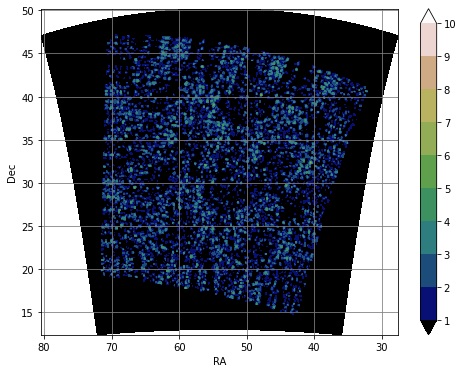

In [5]:
data_collection=disp.get_product(instrument='isgri',
                                 product='isgri_image',
                                 T1='2003-03-15T23:27:40.0',
                                 T2='2023-03-16T00:03:12.0',
                                 integral_data_rights="all-private",
                                 osa_version='OSA10.2',
                                 RA=50,
                                 DEC=45,
                                 max_pointings=1,
                                 detection_threshold=5.0,
                                 radius=15.,
                                 product_type='Real',
                                 token=discover_token()
                                )
#     continue

img = oda_api.plot_tools.OdaImage(data_collection)

img_fn = img.get_image_for_gallery()

token = discover_token()

token = open(os.path.join(os.getenv('HOME'), '.oda-token')).read().strip()

d = disp.post_data_product_to_gallery(token=token,
                                      product_title="very nice title",
                                      gallery_image_path=img_fn,
                                     )


print("posted as", d['_links']['self']['href'].split("?")[0])